In [ ]:
# Note: if it states you must restart the runtime in order to use a
# newly installed version of a package, you do NOT need to do this. 
!pip install detecto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt

from torchvision import transforms
from detecto import core, utils, visualize

In [ ]:
# utils.xml_to_csv('/content/Label', '/content/label.csv')

,filename,width,height,class,xmin,ymin,xmax,ymax,image_id
0,merged_4.jpg,1200,1200,Biji Kakao,10,6,194,190,0
1,merged_4.jpg,1200,1200,Biji Kakao,254,23,447,199,0
2,merged_4.jpg,1200,1200,Biji Kakao,521,26,685,193,0
3,merged_4.jpg,1200,1200,Biji Kakao,759,17,923,190,0
4,merged_4.jpg,1200,1200,Biji Kakao,1000,20,1145,187,0
...,...,...,...,...,...,...,...,...,...
995,merged_10.jpg,1200,1200,Biji Kakao,43,1001,161,1130,39
996,merged_10.jpg,1200,1200,Biji Kakao,280,995,432,1145,39
997,merged_10.jpg,1200,1200,Biji Kakao,517,980,651,1140,39
998,merged_10.jpg,1200,1200,Biji Kakao,754,998,891,1140,39


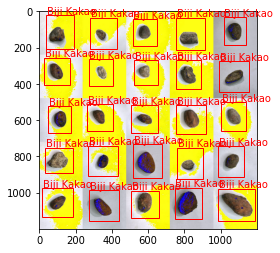

In [ ]:
dataset = core.Dataset('/content/label.csv', '/content/Images/')#, transform=transform_img)

# dataset[i] returns a tuple containing our transformed image and
# and a dictionary containing label and box data
image, target = dataset[1]

# Show our image along with the box. Note: it may
# be colored oddly due to being normalized by the 
# dataset and then reverse-normalized for plotting
visualize.show_labeled_image(image, target['boxes'], target['labels'])

Epoch 1 of 10
Begin iterating over training dataset


100%|██████████| 20/20 [00:08<00:00,  2.45it/s]


Begin iterating over validation dataset


100%|██████████| 40/40 [00:05<00:00,  7.41it/s]


Loss: 0.7590404406189919
Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 20/20 [00:08<00:00,  2.41it/s]


Begin iterating over validation dataset


100%|██████████| 40/40 [00:05<00:00,  7.35it/s]


Loss: 0.5782298602163791
Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 20/20 [00:08<00:00,  2.39it/s]


Begin iterating over validation dataset


100%|██████████| 40/40 [00:05<00:00,  7.38it/s]


Loss: 0.7498477652668953
Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 20/20 [00:08<00:00,  2.34it/s]


Begin iterating over validation dataset


100%|██████████| 40/40 [00:05<00:00,  7.33it/s]


Loss: 0.5117205239832401
Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 20/20 [00:08<00:00,  2.46it/s]


Begin iterating over validation dataset


100%|██████████| 40/40 [00:05<00:00,  7.16it/s]


Loss: 0.4655216135084629
Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 20/20 [00:08<00:00,  2.39it/s]


Begin iterating over validation dataset


100%|██████████| 40/40 [00:06<00:00,  5.83it/s]


Loss: 0.44838582798838617
Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 20/20 [00:08<00:00,  2.47it/s]


Begin iterating over validation dataset


100%|██████████| 40/40 [00:05<00:00,  7.09it/s]


Loss: 0.44584112912416457
Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 20/20 [00:08<00:00,  2.42it/s]


Begin iterating over validation dataset


100%|██████████| 40/40 [00:05<00:00,  7.28it/s]


Loss: 0.44478638395667075
Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 20/20 [00:09<00:00,  2.22it/s]


Begin iterating over validation dataset


100%|██████████| 40/40 [00:05<00:00,  7.43it/s]


Loss: 0.4405475243926048
Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 20/20 [00:08<00:00,  2.44it/s]


Begin iterating over validation dataset


100%|██████████| 40/40 [00:05<00:00,  7.45it/s]


Loss: 0.44281231313943864


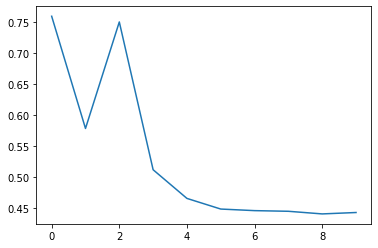

In [ ]:
loader = core.DataLoader(dataset, batch_size=2, shuffle=True)

# Create our model, passing in all unique classes we're predicting
# Note: make sure these match exactly with the labels in the XML/CSV files!
model = core.Model(model_name='fasterrcnn_resnet50_fpn',classes=['Biji Kakao'])

# Train the model! This step can take a while, so make sure you
# the GPU is turned on in Edit -> Notebook settings
losses = model.fit(loader, dataset, epochs=10, verbose=True)

# Plot the accuracy over time
plt.plot(losses)
plt.show()

In [ ]:
model.save('model_weights.pth')

In [ ]:
model_od = core.Model.load('model_weights.pth', ['Biji Kakao'])

In [ ]:
from detecto import core, utils, visualize
from detecto.visualize import show_labeled_image, plot_prediction_grid
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

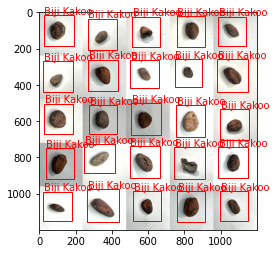

In [ ]:
image = utils.read_image("/content/Images/merged_4.jpg") 
predictions = model_od.predict(image)
labels, boxes, scores = predictions
show_labeled_image(image, boxes, labels)

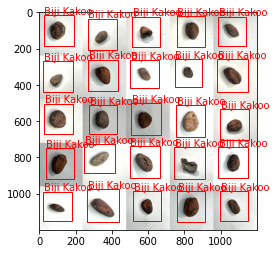

In [ ]:
thresh=0.5
filtered_indices=np.where(scores>thresh)
filtered_scores=scores[filtered_indices]
filtered_boxes=boxes[filtered_indices]
num_list = filtered_indices[0].tolist()
filtered_labels = [labels[i] for i in num_list]
show_labeled_image(image, filtered_boxes, filtered_labels)

In [ ]:
import os

fname = os.listdir('/content/Images/')

precision_per_image = []
for x in fname :
  path = os.path.join('/content/Images/',x)
  image = utils.read_image(path) 
  predictions = model_od.predict(image)
  labels, boxes, scores = predictions
  thresh=0
  filtered_indices=np.where(scores>thresh)
  filtered_scores=scores[filtered_indices]
  filtered_boxes=boxes[filtered_indices]
  num_list = filtered_indices[0].tolist()
  filtered_labels = [labels[i] for i in num_list]
  scores_per_beans = np.array(filtered_scores)
  tp=0
  fp=0
  for x in scores_per_beans :
    if x>=0.8 :
      tp=tp+1
    else :
      fp=fp+1
  precision = tp/(tp+fp)
  precision_per_image.append(precision)

print("Skor mAP dari Algoritma Deteksi Objek yang digunakan adalah " + str(np.array(precision_per_image).mean()))


Skor mAP dari Algoritma Deteksi Objek yang digunakan adalah 0.9842653993516063


In [ ]:
# Intersection over Union (IoU)